<a href="https://colab.research.google.com/github/jjdevhub/mlops-fastcampus/blob/main/CH02_03_MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B%EC%9D%98_%EC%9D%B4%ED%95%B4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

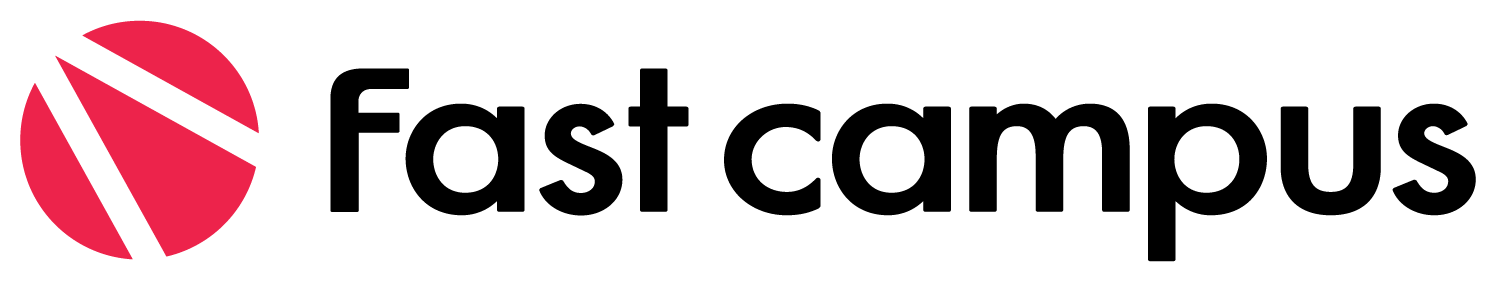

## 백엔드 개발자를 위한 MLOps

### 2.3 MNIST 데이터셋의 이해

MNIST 데이터셋의 구조와 사용 방법 소개.

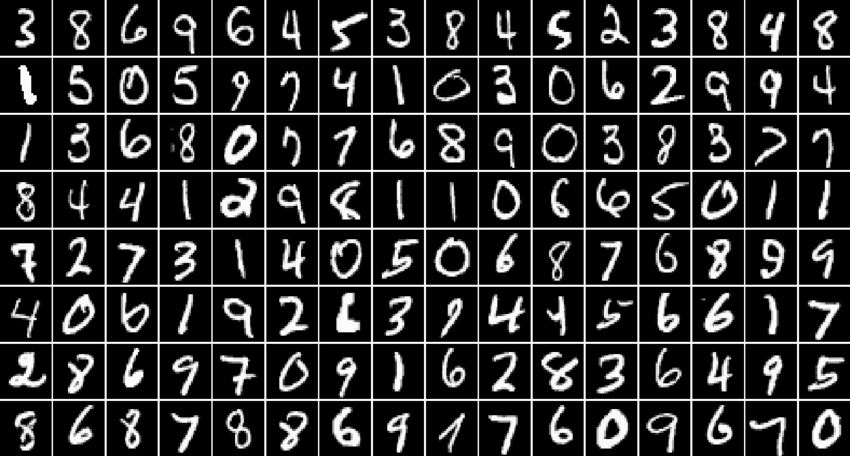

이 노트북에서는 MNIST 데이터셋을 사용하여, 500 units의 히든 레이어를 가진 FC(Fully-connected layer network)를 구성하여 손글씨로 쓰여진 숫자를 예측하는 딥러닝 모델을 학습시키고 검증하는 과정을 담습니다.

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from itertools import islice
from torch.autograd import Variable

In [ ]:
input_size = 784  # 이미지 사이즈 = (너비: 28, 높이: 28) => 28 * 28 = 784 픽셀 해상도
hidden_size = 500 # 은닉 레이어 숫자
num_classes = 10  # 숫자 0 ~ 9까지 총 10가지 종류의 클래스 선별 태스크
num_epochs = 20   # 학습에 사용할 세대 수
batch_size = 100  # 매 학습 사이클의 입력 배치 크기
lr = 1e-3         # 학습에서 사용할 학습 진척도

In [ ]:
train_data = dsets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)
test_data = dsets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 109690632.18it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 56951431.04it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25723212.24it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23374881.92it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [ ]:
net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [ ]:
# [Training]

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = Variable(images.view(-1, 28 * 28)).cuda()
    labels = Variable(labels).cuda()

    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print("Epoch [%d/%d], Step [%d/%d], Loss: %.4f"
                 %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data))

Epoch [1/20], Step [100/600], Loss: 0.3463
Epoch [1/20], Step [200/600], Loss: 0.4496
Epoch [1/20], Step [300/600], Loss: 0.2393
Epoch [1/20], Step [400/600], Loss: 0.0756
Epoch [1/20], Step [500/600], Loss: 0.2302
Epoch [1/20], Step [600/600], Loss: 0.1835
Epoch [2/20], Step [100/600], Loss: 0.1395
Epoch [2/20], Step [200/600], Loss: 0.1157
Epoch [2/20], Step [300/600], Loss: 0.1999
Epoch [2/20], Step [400/600], Loss: 0.0768
Epoch [2/20], Step [500/600], Loss: 0.1389
Epoch [2/20], Step [600/600], Loss: 0.1062
Epoch [3/20], Step [100/600], Loss: 0.0665
Epoch [3/20], Step [200/600], Loss: 0.0675
Epoch [3/20], Step [300/600], Loss: 0.0803
Epoch [3/20], Step [400/600], Loss: 0.0553
Epoch [3/20], Step [500/600], Loss: 0.1128
Epoch [3/20], Step [600/600], Loss: 0.0381
Epoch [4/20], Step [100/600], Loss: 0.1494
Epoch [4/20], Step [200/600], Loss: 0.0584
Epoch [4/20], Step [300/600], Loss: 0.0364
Epoch [4/20], Step [400/600], Loss: 0.0489
Epoch [4/20], Step [500/600], Loss: 0.0663
Epoch [4/20

In [ ]:
# [Validation]

correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28 * 28)).cuda()
  labels = labels.cuda()

  output = net(images)
  _, predicted = torch.max(output, 1)
  correct += (predicted == labels).sum()
  total += labels.size(0)

print("Accuracy of the model: %.3f %%" %((100*correct)/(total+1)))

Accuracy of the model: 98.420 %


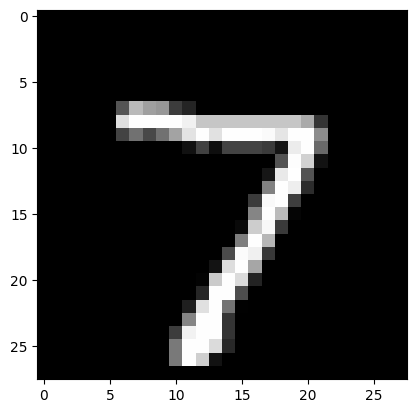

label=tensor(7)
pred=tensor([7], device='cuda:0')


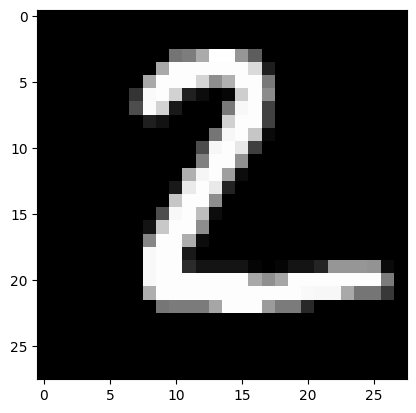

label=tensor(2)
pred=tensor([2], device='cuda:0')


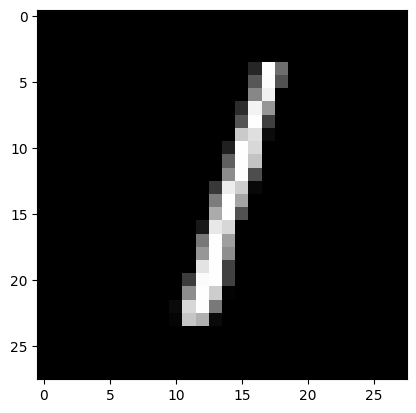

label=tensor(1)
pred=tensor([1], device='cuda:0')


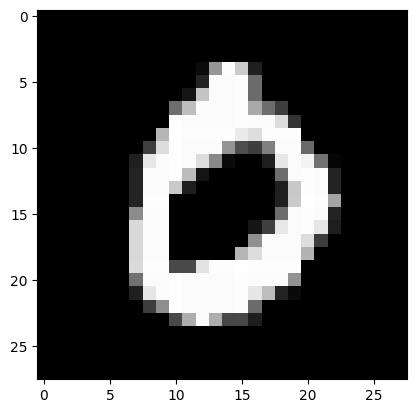

label=tensor(0)
pred=tensor([0], device='cuda:0')


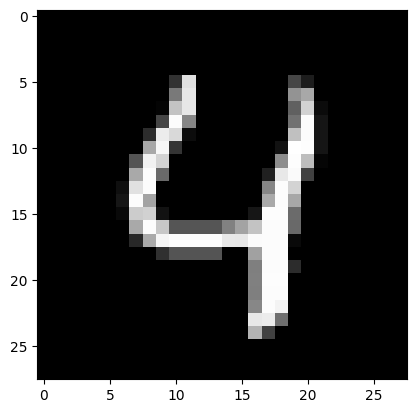

label=tensor(4)
pred=tensor([4], device='cuda:0')


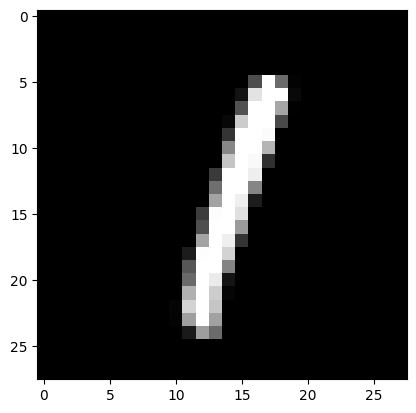

label=tensor(1)
pred=tensor([1], device='cuda:0')


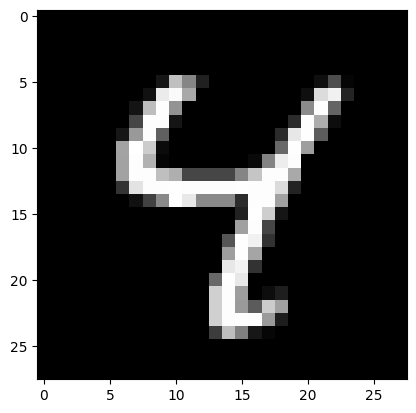

label=tensor(4)
pred=tensor([4], device='cuda:0')


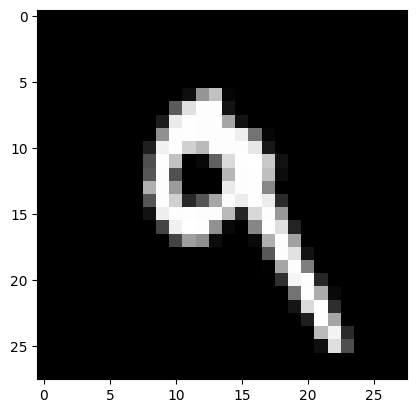

label=tensor(9)
pred=tensor([9], device='cuda:0')


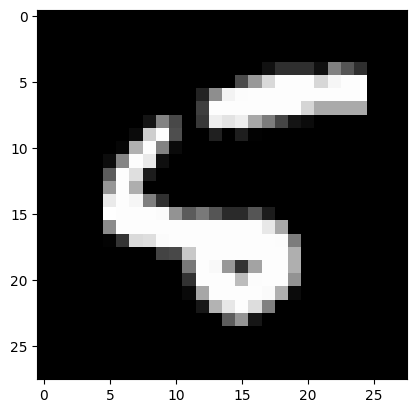

label=tensor(5)
pred=tensor([5], device='cuda:0')


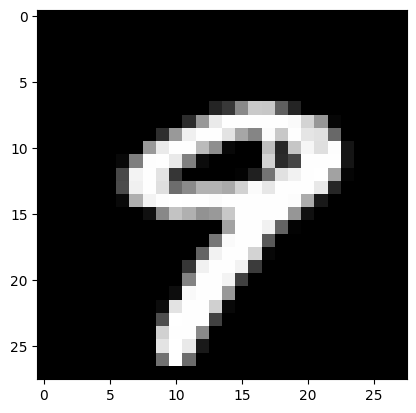

label=tensor(9)
pred=tensor([9], device='cuda:0')


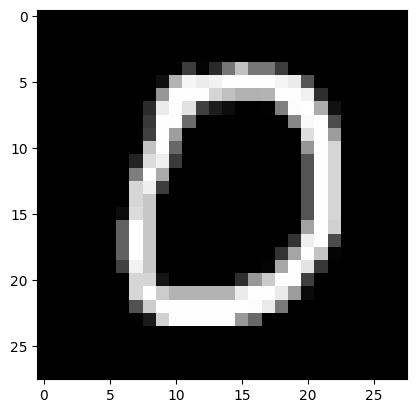

label=tensor(0)
pred=tensor([0], device='cuda:0')


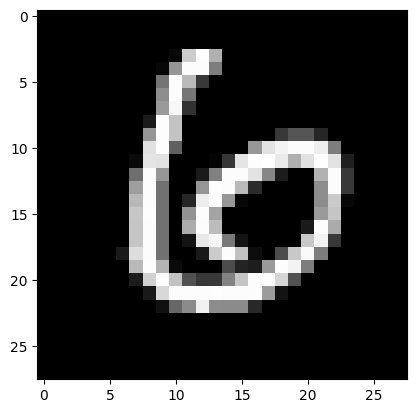

label=tensor(6)
pred=tensor([6], device='cuda:0')


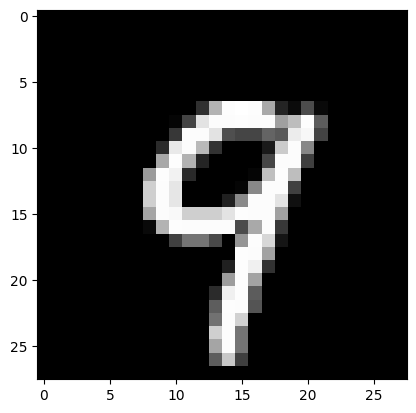

label=tensor(9)
pred=tensor([9], device='cuda:0')


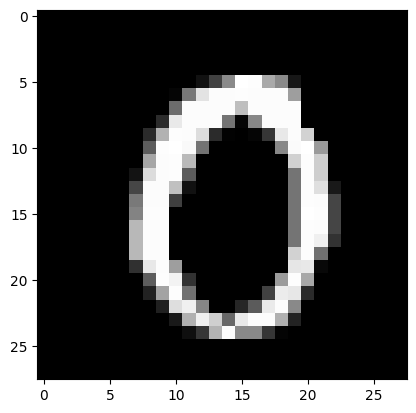

label=tensor(0)
pred=tensor([0], device='cuda:0')


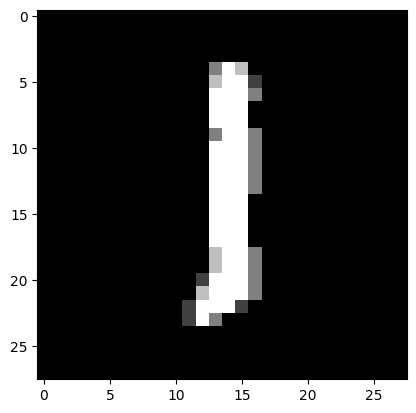

label=tensor(1)
pred=tensor([1], device='cuda:0')


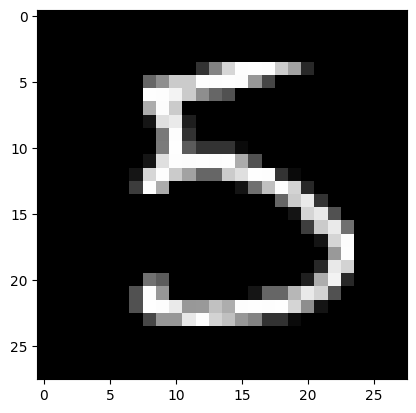

label=tensor(5)
pred=tensor([5], device='cuda:0')


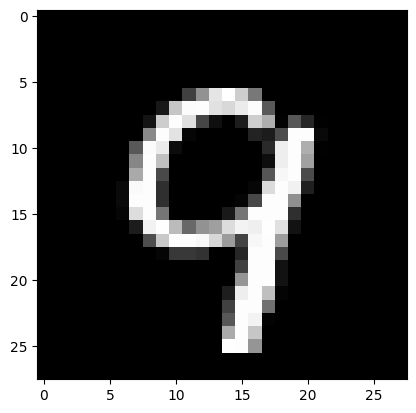

label=tensor(9)
pred=tensor([9], device='cuda:0')


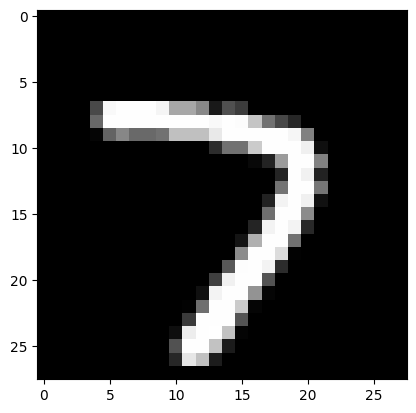

label=tensor(7)
pred=tensor([7], device='cuda:0')


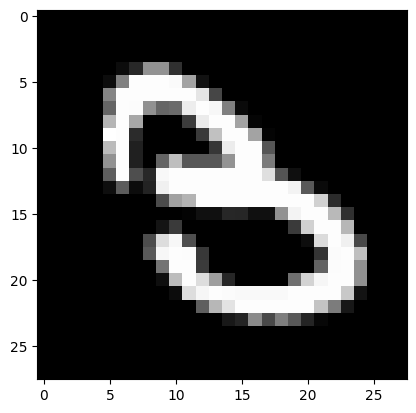

label=tensor(3)
pred=tensor([3], device='cuda:0')


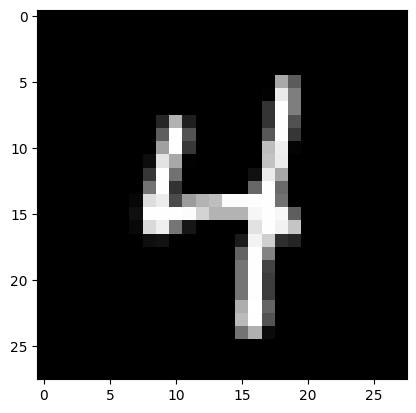

label=tensor(4)
pred=tensor([4], device='cuda:0')


In [ ]:
images, labels = next(iter(test_loader))
for image, label in islice(zip(images, labels), 20):
    _, pred = torch.max(net(Variable(image.view(-1, 28 * 28).cuda())), 1)
    plt.imshow(image.reshape(28, 28), cmap="gray")
    plt.show()

    print(f"{label=}")
    print(f"{pred=}")